# 簡単な非線形ダイナミクス
通常、物理現象はなんらかの外力や外場に対して線形に応答すると近似されることが多いです。電気伝導のオームの法則しかり、熱伝導のフーリエの法則しかり。そこまで急峻な外場や、特殊な状態でないかぎり、この線形の近似は妥当であり、かつ計算上も便利です。

その一方で、非線形な方程式にしたがう系の時間発展は、予想もつかないカオスな振る舞いをしたり、いわゆる「複雑系」のベースになっており、これもまた魅力的です。非線形方程式のダイナミクスは、生物から物理、経済に至るまで、色々なところで現れてくるので、pythonを使って実際に計算したり、可視化したりしてみましょう。

## 個体数のダイナミクスとロジスティック写像
非線形ダイナミクスの入門例としてよく取り上げられるのが、昆虫の大発生の問題です。イナゴの大群、素数ゼミ etc…のようなニュースを聞いたことがあるでしょう。

昆虫が増える過程のシミュレーションをしようとしたときに、どういった前提条件でどういった方程式を立てればよいでしょうか？

まず、生物の繁殖を考えるときは、世代で考えることが多いので、ある一定の寿命$\Delta t$をもった世代ごとの個体数を追跡する形で離散化することが妥当でしょう。

各世代での増加する過程については、単純化すると以下のような条件を満たすべきだと考えられます

１）ある世代iで増える個体数 $\Delta N_i$ はその時点での個体数$N_i$に比例する 

２）個体数には最大値$N_*$がある

１）の条件は
$\frac{\Delta N_i}{\Delta t}=\lambda N_i$
という風に書けます。$\lambda$は比例係数です

２）の条件は増加率$\lambda$が個体数が$N*$に近づくにつれ、頭打ちになるようにしてやれば導入することができます。これは
$\lambda \rightarrow \lambda'(N_*-N_i)$
と置き直せば実現できます

これらを用いると、１世代あとの個体数$N_{i+1}$の式として

$$
N_{i+1}=N_i+\Delta N_i =N_i+\lambda'\Delta t(N_*-N_i)N_i \\
=N_i+(1+\lambda'\Delta t N_*)(1-\frac{\lambda' \Delta t}{1+\lambda' \Delta t N_*}N_i)
$$

が得られます。この関係式がどうやって得られるかは以下の模式図を見れば納得できるでしょう



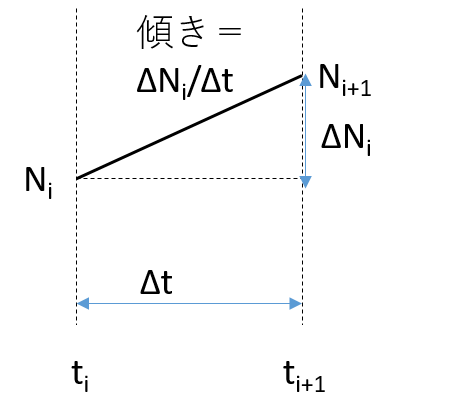

In [1]:
from IPython.display import Image
Image("./img/LogisticMap-1.png")

少しの近似と、ややこしい部分の書き換えを行うと、これはもっと簡単な漸化式の形に落ち着きます。

$$
\mu=1+\lambda' \Delta t N_*
$$

とし、さらに

$$
\frac{\lambda' \Delta t N_i}{1+\lambda' \Delta t N_*}\sim \frac{N_i}{N_*}
$$

の近似を行い、新たに$\frac{N_i}{N_*}=x_i$と置き直しましょう

すると個体数の式は

$$
x_{i+1}=\mu x_i(1-x_i)
$$

のようなシンプルな形になります

これはとても単純に見えますが、実はその振る舞いは意外に奥深く、パラメーター$\mu$の値をどう取るかで個体数の時間発展が大きく変わってきます。さらにその背後にはカオスの存在が見えてきます。このようにシンプルでありながら色々な側面を見せるこの式は「ロジスティック写像」と呼ばれています

## ロジスティック写像の数値計算

ロジスティック写像の面白いふるまいを目で見て確認するために実際にpythonでプログラムを書いて、個体数のシミュレーションを行ってみましょう。

シミュレーションを行う前に、まず、ロジスティック写像の初期値や、増加率$\mu$としてどのような値の範囲を取りうるかを考えておく必要があります。

式の形から、ロジスティック写像は$0<x_i<1$で最大値$\mu/4$をとる放物線がベースになっていることがわかります。
($x_i$の定義は最大の個体数とその世代の個体数の比ですから、１を超えない前提があるのはわかりますね)

$x_{i+1}$が同じ\[0,1\]の区間に戻るようにするためには、$0<\mu<4$である必要があります

ひとまず、$x_i$の初期値は0.1として、$\mu$をこの範囲で様々に振ってみましょう

50世代に渡る個体数を$\mu=0.4$で計算し、プロットするサンプルが以下のものです。
どのような結果が出るでしょうか？

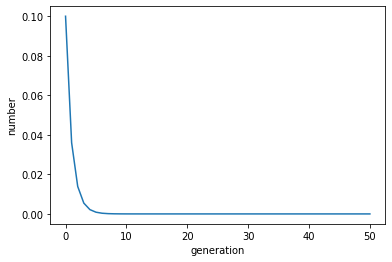

In [2]:
import matplotlib.pyplot as plt
y=[]

yinit=0.1
mu=0.4
y.append(yinit)
yold=yinit
for i in range(50):
    ynew=mu*yold*(1.0-yold)
    y.append(ynew)
    yold=ynew

plt.xlabel("generation")
plt.ylabel("number")
plt.plot(y)
plt.show()

この場合は個体数が０になっていく、絶滅するという残念な結果になってしまいます。個体数がどんどん減少してしまうので残念ながら当然ですね

では$\mu$を１より大きい値にしてみましょう
$\mu=1.3$の結果は以下のようになります。もう少し希望の持てる感じで、ある一定の値に収束する様子が見て取れますね

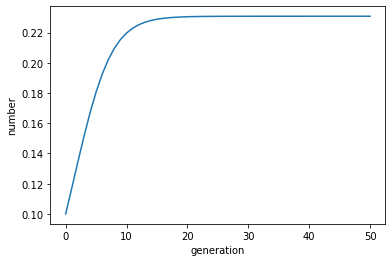

In [3]:
import matplotlib.pyplot as plt
y=[]

yinit=0.1
mu=1.3
y.append(yinit)
yold=yinit
for i in range(50):
    ynew=mu*yold*(1.0-yold)
    y.append(ynew)
    yold=ynew

plt.xlabel("generation")
plt.ylabel("number")
plt.plot(y)
plt.show()

１より大きければこのような感じで常にある値に収束し安定するかというと、そうでもありません。
面白いことに、$\mu$が３を超えだすと、俄然面白いふるまいが出てきます。それは周期性が出てくるという点です

たとえば$\mu=3.3$の結果は以下の様になります

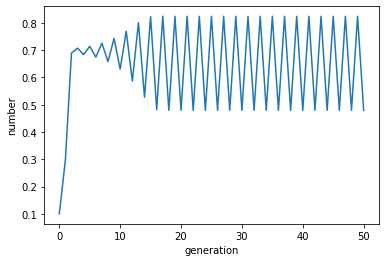

In [4]:
import matplotlib.pyplot as plt
y=[]

yinit=0.1
mu=3.3
y.append(yinit)
yold=yinit
for i in range(50):
    ynew=mu*yold*(1.0-yold)
    y.append(ynew)
    yold=ynew

plt.xlabel("generation")
plt.ylabel("number")
plt.plot(y)
plt.show()

個体数が多い状態と少ない状態を行ったり来たりしている様が見られます

２つの状態だけではなく、もっと数多くの状態を行き来するような振る舞いも$\mu$の値によっては出てきます。
$\mu=3.5$では４つの状態を行き来しているのが見えますね

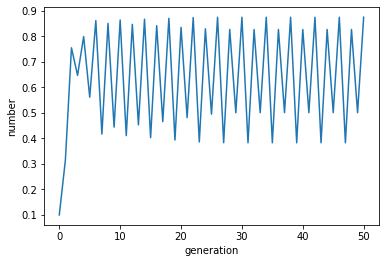

In [5]:
import matplotlib.pyplot as plt
y=[]

yinit=0.1
mu=3.5
y.append(yinit)
yold=yinit
for i in range(50):
    ynew=mu*yold*(1.0-yold)
    y.append(ynew)
    yold=ynew

plt.xlabel("generation")
plt.ylabel("number")
plt.plot(y)
plt.show()

$\mu$が増えていくにつれ、このような４倍・８倍・１６倍・３２倍…の周期が出てきます。
では上限である４に近づいたとき、何が起きるのでしょうか

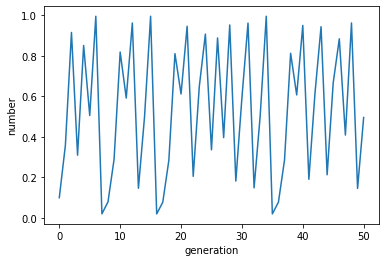

In [6]:
import matplotlib.pyplot as plt
y=[]

yinit=0.1
mu=3.98
y.append(yinit)
yold=yinit
for i in range(50):
    ynew=mu*yold*(1.0-yold)
    y.append(ynew)
    yold=ynew

plt.xlabel("generation")
plt.ylabel("number")
plt.plot(y)
plt.show()

周期があるのだかないのだかわからない状態が出てきていますね。これがカオスな状態が発生している例です

## カオスな状態を解析しよう（軌道図）
上で見たように、パラメーター$\mu$の値によって、様々な周期が、そしてカオスな状態が現れてくることがわかります。この周期やカオスな状況の$\mu$依存性をひと目でみてわかるように図示してみましょう。

周期があるかないかと言うのは、ある程度の試行回数をへて挙動が安定したあとに、さらに200回や300回の試行回数でシュミレーションを実行し、その間に出てくる値を記録しておき、それを散布図で示してやると視覚的に分かりやすいです。
文字で書くとイメージが伝わりにくいので、模式図を示します。

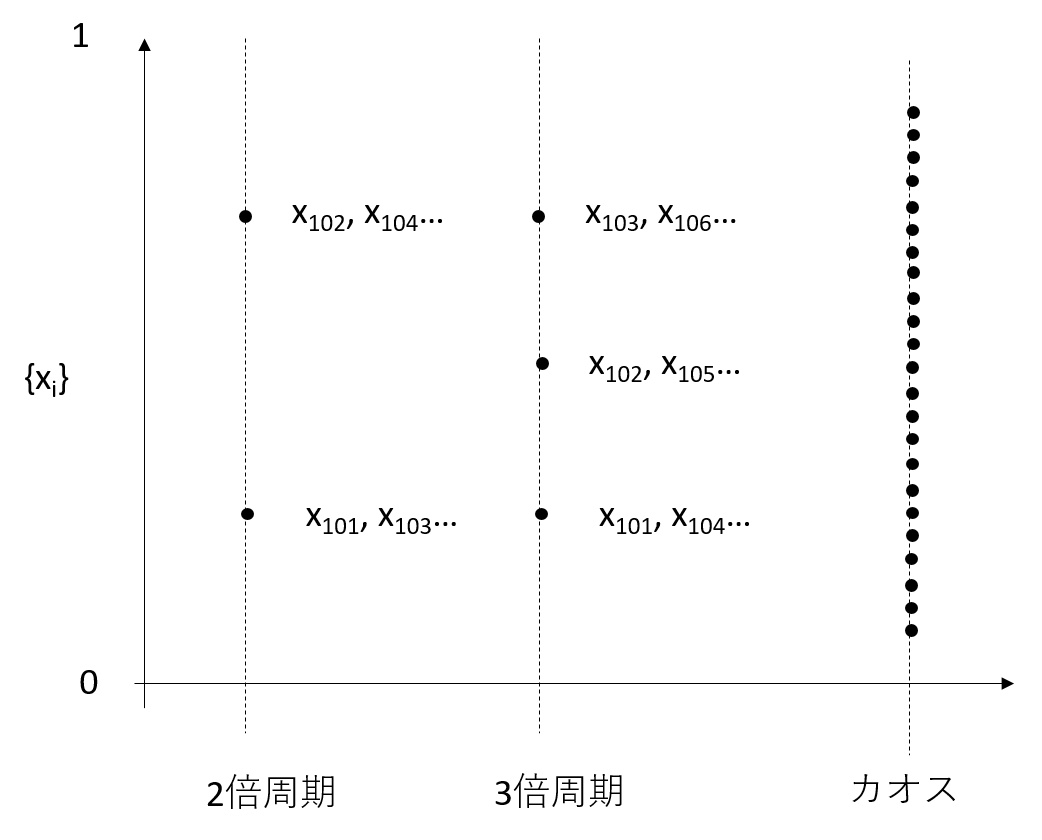

In [7]:
Image("./img/orbitalPlot.png")

このような図を軌道図と呼びます。
$\mu$が3.4以上の区間で、軌道図を実際にプロットしてみるプログラムを作ってみましょう。


ロジスティック写像のシミュレーション自体は上に示したサンプルと同じです。
今回はこれを、様々な$\mu$の値で行います。

### プログラムの大まかな流れ
- 計算する$\mu$のサンプル値を決めます

- 各$\mu$でのシミュレーションを繰り返します

- 繰り返しの中で、あとで散布図を書くために、シミュレーションを行っている$\mu$の値と、$x_i$の値を保存します。
周期性を議論するためには、シミュレーションが安定したあとの結果を使う必要があるので各$\mu$にて最初の200回程度の試行での$x_i$の値は保存せず、201回からの値を保存するようにします。

- 最後にmatplotlib.pyplotのscatterという関数で散布図を書きます

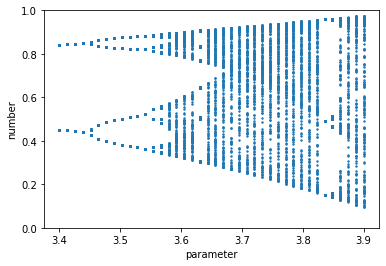

In [8]:
import matplotlib.pyplot as plt
from numpy import linspace

#running total 400 times simulation for eash \mu
#0~200 : for preparation, does not use data
#201~400 : save data and use to plot

mulist=linspace(3.4,3.9,40)
yinit =0.1
ydata=[]
xdata=[]
for mu in mulist:
    yold=yinit
    for i in range(400):
        ynew=mu*yold*(1.0-yold)
        #store only if after 200 trial step
        if(i>200):
            xdata.append(mu)
            ydata.append(ynew)
        yold=ynew

ax=plt.subplot()
ax.set_ylim([0.0,1.0])
plt.xlabel("parameter")
plt.ylabel("number")
ax.scatter(xdata,ydata,s=2)
plt.show()

## 課題
上記のサンプルプログラムで$\mu$を\[3.847~3.856\]で振って拡大したときに、全体と同じような図形が現れるフラクタルの性質を備えていることを確認してみましょう